In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
data = pd.read_csv('C:/Users/Admin/Desktop/Data/Assignments New/Decision Trees/Company_Data (1).csv',index_col=0)
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 10)

In [4]:
data.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 400 entries, 9.5 to 9.71
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
dtypes: int64(7), object(3)
memory usage: 34.4+ KB


In [7]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])

In [8]:
x=data.drop(['Income'],axis=1)
y=data['Income']

In [9]:
data['Income'].unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23], dtype=int64)

In [10]:
colnames = list(data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

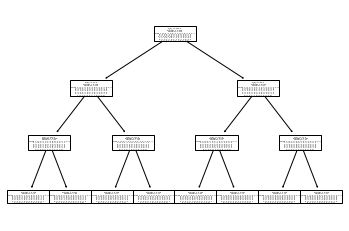

In [13]:
tree.plot_tree(model);

In [14]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

32    26
25    20
54    10
60     9
63     7
73     4
53     3
62     1
dtype: int64

In [15]:
pd.crosstab(y_test,preds)

col_0,25,32,53,54,60,62,63,73
Income,,,,,,,,
21,1,0,0,0,0,0,0,0
22,0,2,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0
26,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
113,1,0,0,0,0,0,0,0
115,0,0,0,1,0,0,0,1
118,0,0,0,0,0,0,0,1


In [16]:
np.mean(preds==y_test)

0.025

##gini criteria

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [18]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.025